# Generate Training and Validation Data from Simulated Model

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from src.plot_tools import confidence_ellipse, set_axes_equal
import mpl_toolkits.mplot3d.art3d as art3d
from src.models import SimpleCar

import torch
from src.datasets import DiscreteDynamicsDataset

%matplotlib inline
%load_ext autoreload
%autoreload 2

### Plot Functions

In [2]:
def plot(x):
    T = x.shape[-2]
    fig = plt.figure(figsize=(12,8))

    ax = fig.add_subplot(221)
    ax.plot(x[:,:,0].T, x[:,:,1].T, lw=0.5) # Particle trajectories
    ax.scatter(x[:,0,0], x[:,0,1], marker='o', s=20)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.grid(True)

    ax = fig.add_subplot(425)
    ax.plot(u[:,:,0].T, lw=0.5)
    ax.set_xlabel('$k$')
    ax.set_ylabel('$u$')
    ax.grid(True)
    
    ax = fig.add_subplot(427)
    ax.plot(u[:,:,1].T, lw=0.5)
    ax.set_xlabel('$k$')
    ax.set_ylabel('$u$')
    ax.grid(True)

    ax = fig.add_subplot(5,2,2)
    ax.plot(x[:,:,0].T, lw=0.5)
    ax.set_xlabel('$k$')
    ax.set_ylabel('$x_1$')
    ax.grid(True)

    ax = fig.add_subplot(5,2,4)
    ax.plot(x[:,:,1].T, lw=0.5)
    ax.set_xlabel('$k$')
    ax.set_ylabel('$x_2$')
    ax.grid(True)


    ax = fig.add_subplot(5,2,6)
    ax.plot(x[:,:,2].T, lw=0.5)
    ax.set_xlabel('$k$')
    ax.set_ylabel('$x_3$')
    ax.grid(True)

    ax = fig.add_subplot(5,2,8)
    ax.plot(x[:,:,3].T, lw=0.5)
    ax.set_xlabel('$k$')
    ax.set_ylabel('$x_4$')
    ax.grid(True)

#     ax = fig.add_subplot(5,2,10)
#     ax.plot(x[:,:,4].T, lw=0.5)
#     ax.set_xlabel('$k$')
#     ax.set_ylabel('$x_5$')
#     ax.grid(True)

### Training Data

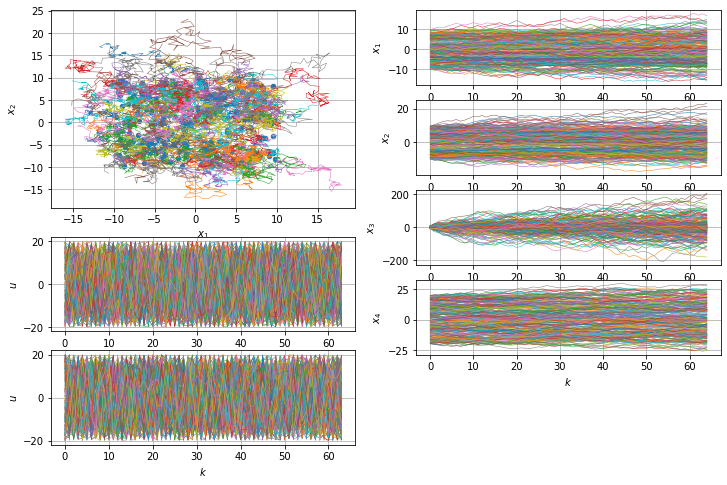

In [6]:
np.random.seed(10)

# Single-integrator model
dt = 0.05
model = SimpleCar(
    dt=dt, 
    process_sigma=[1.e-3, 1.e-3, 2.e-2, 2.e-2], 
)

n_batches = 250
T = 64

x = np.zeros((n_batches, T+1, model.nx))
x[:,0,:] = np.stack((
    np.random.random((n_batches)) * 20 - 10,
    np.random.random((n_batches)) * 20 - 10,
    np.random.random((n_batches)) * 20 - 10,
    np.random.random((n_batches)) * 40 - 20,
), axis=-1)

u = np.stack((
    np.random.random((n_batches, T))*40 - 20,
    np.random.random((n_batches, T))*40 - 20,
), axis=-1)

for batch in range(n_batches):
    for k in range(T):
        x[batch, k+1] = model.step(x[batch, k], u[batch, k])

plot(x)

In [7]:
# Save training data
save_as = 'data/train_simple_car_data.pt' 
data = DiscreteDynamicsDataset(x, u)
print('Number of data points: ', len(data))
torch.save(data, save_as)
print('Saved training data to ', save_as)

Number of data points:  16000
Saved training data to  data/train_simple_car_data.pt


### Test Data

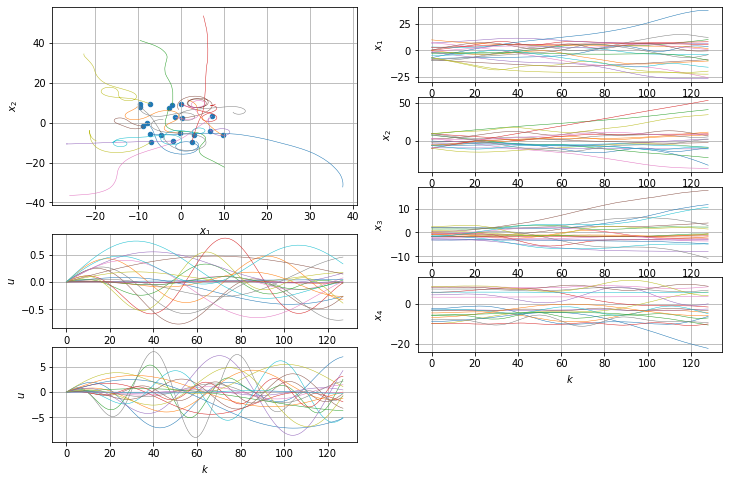

In [10]:
#### np.random.seed(10)

# Single-integrator model
dt = 0.05
model = SimpleCar(
    dt=dt, 
    process_sigma=[1.e-3, 1.e-3, 2.e-2, 2.e-2], 
)

n_batches = 20
T = 128

x = np.zeros((n_batches, T+1, model.nx))
x[:,0,:] = np.stack((
    np.random.random((n_batches)) * 20 - 10,
    np.random.random((n_batches)) * 20 - 10,
    np.random.random((n_batches)) * 2 * np.pi - np.pi,
    np.random.random((n_batches)) * 20 - 10,
), axis=-1)
    
t = np.arange(0,T*dt,dt)
u = np.zeros((n_batches, T, model.nu))
for batch in range(n_batches):
    u[batch] = np.stack((
        1*np.random.random()*np.sin((1.*np.random.random()) * t) * np.cos((2.*np.random.random()) * t),
        10*np.random.random()*np.sin((1.*np.random.random()) * t) * np.cos((4.*np.random.random()) * t)
    ), axis=-1)
    for k in range(T):
        x[batch, k+1] = model.step(x[batch, k], u[batch, k])

plot(x)



In [11]:
# Save test data
save_as = 'data/test_simple_car_data.pt' 
data = DiscreteDynamicsDataset(x, u)
print('Number of data points: ', len(data))
torch.save(data, save_as)
print('Saved test data to ', save_as)

Number of data points:  2560
Saved test data to  data/test_simple_car_data.pt
